#  Gradebook for schools
 Gradebook consists of Class 7 students pf school 
I have created my own dataset in which unique id for student is their roll no.
By carefully observing the attributes,the appropriate visualization has been
performed.
For Grade of students they have 5 subjects 
Goal is to remove the percentage of each students and give them grades according to their scores


In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('exams.csv')
df.head(10)

,student_rollno,student names,gender,math score,science score,history score,geog score,sports score
0,1,Brian,female,72.0,72.0,74.0,72.0,72.0
1,2,Christopher,male,69.0,90.0,88.0,69.0,90.0
2,3,Ricky,female,90.0,95.0,93.0,90.0,95.0
3,4,George,male,47.0,57.0,44.0,47.0,57.0
4,5,Henry,male,76.0,78.0,75.0,76.0,78.0
5,6,Keith,male,71.0,83.0,78.0,71.0,83.0
6,7,Joseph,male,88.0,95.0,92.0,88.0,95.0
7,8,John,female,40.0,43.0,39.0,40.0,43.0
8,9,William,female,64.0,64.0,67.0,64.0,64.0
9,10,Thomas,male,38.0,60.0,50.0,38.0,60.0


In [130]:
df.shape

(20, 8)

In [131]:
df.describe()

,student_rollno,math score,science score,history score,geog score,sports score
count,20.00000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.50000,61.421053,67.736842,64.947368,61.421053,67.736842
std,5.91608,19.712703,18.902798,19.534794,19.712703,18.902798
min,1.00000,18.000000,32.000000,28.000000,18.000000,32.000000
25%,5.75000,46.500000,53.500000,48.000000,46.500000,53.500000
50%,10.50000,65.000000,72.000000,70.000000,65.000000,72.000000
75%,15.25000,74.000000,82.000000,78.000000,74.000000,82.000000
max,20.00000,90.000000,95.000000,93.000000,90.000000,95.000000


# Calculate total marks

In [132]:
df["Total_Marks"] = df["math score"] + df["science score"] + df["history score"] + df["geog score"] + df["sports score"]
df.head()

,student_rollno,student names,gender,math score,science score,history score,geog score,sports score,Total_Marks
0,1,Brian,female,72.0,72.0,74.0,72.0,72.0,362.0
1,2,Christopher,male,69.0,90.0,88.0,69.0,90.0,406.0
2,3,Ricky,female,90.0,95.0,93.0,90.0,95.0,463.0
3,4,George,male,47.0,57.0,44.0,47.0,57.0,252.0
4,5,Henry,male,76.0,78.0,75.0,76.0,78.0,383.0


# Calculate Percentage

In [133]:
df['Percentage'] = df['Total_Marks']/5
df.head()

,student_rollno,student names,gender,math score,science score,history score,geog score,sports score,Total_Marks,Percentage
0,1,Brian,female,72.0,72.0,74.0,72.0,72.0,362.0,72.4
1,2,Christopher,male,69.0,90.0,88.0,69.0,90.0,406.0,81.2
2,3,Ricky,female,90.0,95.0,93.0,90.0,95.0,463.0,92.6
3,4,George,male,47.0,57.0,44.0,47.0,57.0,252.0,50.4
4,5,Henry,male,76.0,78.0,75.0,76.0,78.0,383.0,76.6


# Label Encoding
0-female
1-male

In [119]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df.head()

,student_rollno,student names,gender,math score,science score,history score,geog score,sports score,Total_Marks,Percentage
0,1,Brian,0,99,100,98,99,100,496,99.2
1,2,Christopher,1,86,87,82,86,87,428,85.6
2,3,Ricky,0,54,64,60,54,64,296,59.2
3,4,George,1,79,80,81,79,80,399,79.8
4,5,Henry,1,84,80,77,84,80,405,81.0


# students passed and failed in every subject

In [134]:
df['math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.math_PassStatus.value_counts()

P    18
F     2
Name: math_PassStatus, dtype: int64

In [135]:
df['science_PassStatus'] = np.where(df['science score']<passmark, 'F', 'P')
df.science_PassStatus.value_counts()

P    19
F     1
Name: science_PassStatus, dtype: int64

In [136]:
df['history_PassStatus'] = np.where(df['history score']<passmark, 'F', 'P')
df.history_PassStatus.value_counts()

P    18
F     2
Name: history_PassStatus, dtype: int64

In [137]:
df['geog_PassStatus'] = np.where(df['geog score']<passmark, 'F', 'P')
df.geog_PassStatus.value_counts()

P    18
F     2
Name: geog_PassStatus, dtype: int64

In [138]:
df['sports_PassStatus'] = np.where(df['sports score']<passmark, 'F', 'P')
df.sports_PassStatus.value_counts()

P    19
F     1
Name: sports_PassStatus, dtype: int64

# Overall passed and failed students

In [139]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['math_PassStatus'] == 'F' or 
                                    x['science_PassStatus'] == 'F' or x['history_PassStatus'] == 'F' or x['geog_PassStatus'] == 'F'or x['sports_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    17
F     3
Name: OverAll_PassStatus, dtype: int64

# Passing marks = 40

In [110]:
passmark = 40

# Let us assign the grades
Grading
above 80 = A Grade
70 to 80 = B Grade
60 to 70 = C Grade
50 to 60 = D Grade
40 to 50 = E Grade
below 40 = F Grade ( means Fail )

In [140]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'
df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    6
A    4
F    4
D    3
E    2
C    1
Name: Grade, dtype: int64

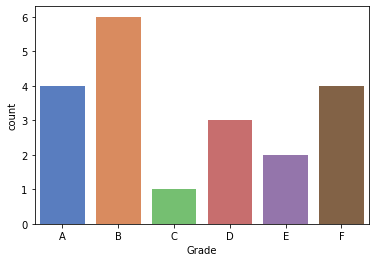

In [141]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

# Grades according to roll nos

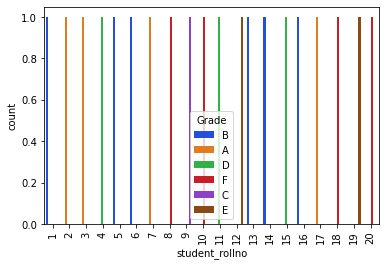

In [142]:
p = sns.countplot(x='student_rollno', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

# Overall dataset with percentage and grades of students

In [152]:
df.head()

,student_rollno,student names,gender,math score,science score,history score,geog score,sports score,Total_Marks,Percentage,math_PassStatus,science_PassStatus,history_PassStatus,geog_PassStatus,sports_PassStatus,OverAll_PassStatus,Grade
0,1,Brian,female,72.0,72.0,74.0,72.0,72.0,362.0,72.4,P,P,P,P,P,P,B
1,2,Christopher,male,69.0,90.0,88.0,69.0,90.0,406.0,81.2,P,P,P,P,P,P,A
2,3,Ricky,female,90.0,95.0,93.0,90.0,95.0,463.0,92.6,P,P,P,P,P,P,A
3,4,George,male,47.0,57.0,44.0,47.0,57.0,252.0,50.4,P,P,P,P,P,P,D
4,5,Henry,male,76.0,78.0,75.0,76.0,78.0,383.0,76.6,P,P,P,P,P,P,B
